# Лабораторная работа №10

### Выполнил Рыбаков Владислав, БПМ201, 29 вариант

Задания 10.1.29, 10.2.15, 10.4.29, 10.5.29, 10.6.29

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 10.1.29

Промоделировать стационарные процессы теплопроводности
стержня в зависимости от входных данных задачи:

\begin{equation*}
 \begin{cases}
   -\dfrac{d}{dx} \left( c \cdot \sqrt{x} \dfrac{du}{dx} \right) = 15(x - \sqrt{x})
   \\
   u(0.5) = 1, \text{   } u(1.5) = 1
 \end{cases}
\end{equation*}

$$ K(x) = \sqrt{x},\\ f(x) = 15(x - \sqrt{x}),\\ a = 0.5, UA = 1, \\b = 1.5, UB = 1$$



Символьное вычисление точного решения краевой задачи

$$ \int{-15(x - \sqrt{x})} dx  = -\dfrac{15x^2}{2} + 10x \sqrt{x} + c1$$

$$ \int{ \dfrac{-\dfrac{15x^2}{2} + 10x \sqrt{x}}{c\sqrt{x}} dx} + \int{ \dfrac{c1}{c\sqrt{x}} dx} + c2
=\dfrac{-3x^2\sqrt{x} + 5x^2}{c} +  \dfrac{2c1 \sqrt{x}}{c} + c2 $$

Найденное решение $$ u(x, c, c1, c2) = \dfrac{-3x^2\sqrt{x} + 5x^2}{c} +  \dfrac{2c1 \sqrt{x}}{c} + c2 $$ 

Найденные константы (при условии с=1):
$$ c1 = -2.18618, c2 = 3.37206$$

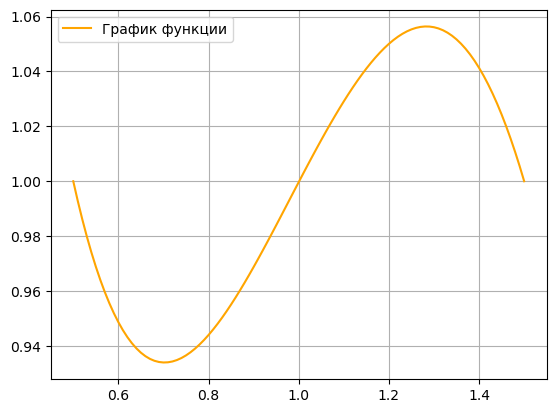

In [2]:
x = np.arange(0.5, 1.51, 0.01)
y = -3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * (-2.18618) * np.sqrt(x) + 3.37206

plt.plot(x, y, color="orange", label="График функции")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
def solve_linear_system(c, ua, ub):
    coefficients = [[(2 * np.sqrt(0.5))/c, 1],
                    [(2 * np.sqrt(1.5))/c, 1]]
    constants = [(3 * 0.5**2 * np.sqrt(0.5) - 5*0.5**2)/ c + ua, 
                 (3 * 1.5**2 * np.sqrt(1.5) - 5*1.5**2)/ c + ub]
    
    A = np.array(coefficients)
    b = np.array(constants)

    try:
        x = np.linalg.solve(A, b)
        return x
    except np.linalg.LinAlgError:
        print("Система уравнений не имеет решения.")
        return None

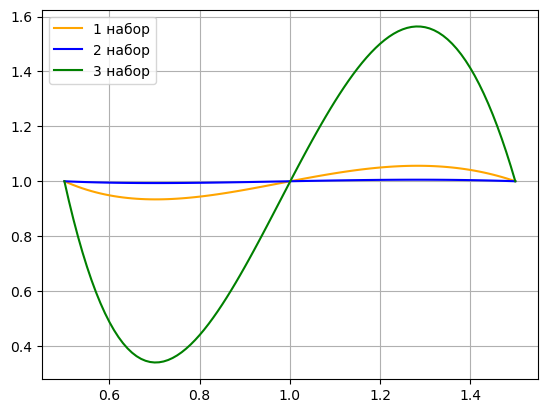

In [4]:
# построим на одном графике все три набора
c11, c21 = solve_linear_system(1, 1, 1)
c12, c22 = solve_linear_system(10, 1, 1)
c13, c23 = solve_linear_system(0.1, 1, 1)

x = np.arange(0.5, 1.51, 0.01)
y1 = -3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c11 * np.sqrt(x) + c21
y2 = (-3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c12 * np.sqrt(x))/10 + c22
y3 = (-3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c13 * np.sqrt(x))/0.1 + c23

plt.plot(x, y1, color="orange", label="1 набор")
plt.plot(x, y2, color="blue", label="2 набор")
plt.plot(x, y3, color="green", label="3 набор")
plt.legend()
plt.grid(True)
plt.show()

### Получили графики, с началами и концами в одних и тех же точках, а так же пересекающие линию $x=1$ в одной точке, но имеющие разную амплитуду

Символьное вычисление точного решения краевой задачи при наборе 4

$$ \int{-15(x - \sqrt{x})} dx  = -\dfrac{15x^2}{2} + 10x \sqrt{x} + c1$$

$$ \int{ \left(-\dfrac{15x^2}{2} + 10x \sqrt{x} \right)} \sqrt{x} dx + \int{ c1 \sqrt{x} dx} + c2
= -\dfrac{15x^3 \sqrt{x}}{7} + \dfrac{10x^3}{3} + \dfrac{2c1 \cdot x\sqrt{x}}{3} + c2$$

Найденное решение $$ u(x, c, c1, c2) = -\dfrac{15x^3 \sqrt{x}}{7} + \dfrac{10x^3}{3} + \dfrac{2c1 \cdot x\sqrt{x}}{3} + c2$$ 

Найденные константы (при условии с=1):
$$ c1 = 0, c2 = 0.77274$$

In [5]:
coefficients = [[(2 * np.sqrt(0.5)*0.5)/3, 1],
                [(2 * np.sqrt(1.5)*1.5)/3, 1]]
constants = [(15 * 0.5**3 * np.sqrt(0.5)/7 - 10*0.5**3/3) + 1, 
             (15 * 0.5**3 * np.sqrt(0.5)/7 - 10*0.5**3/3) + 1]

A = np.array(coefficients)
b = np.array(constants)
cc1, cc2 = np.linalg.solve(A, b)
cc1, cc2

(0.0, 0.7727369354368728)

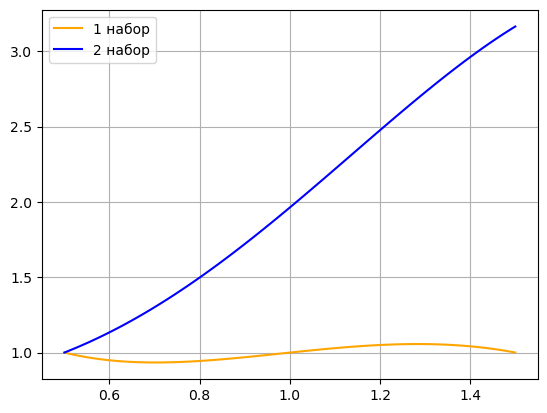

In [6]:
# построим на одном графике наборы 1 и 4
x = np.arange(0.5, 1.51, 0.01)
y1 = -3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c11 * np.sqrt(x) + c21
y2 = -15 * x**3 * np.sqrt(x)/7 + 10*x**3/3 + 2*cc1*x*np.sqrt(x)/3 + cc2
plt.plot(x, y1, color="orange", label="1 набор")
plt.plot(x, y2, color="blue", label="2 набор")
plt.legend()
plt.grid(True)
plt.show()

### При таком k(х) функция получилась не такой же, как первая

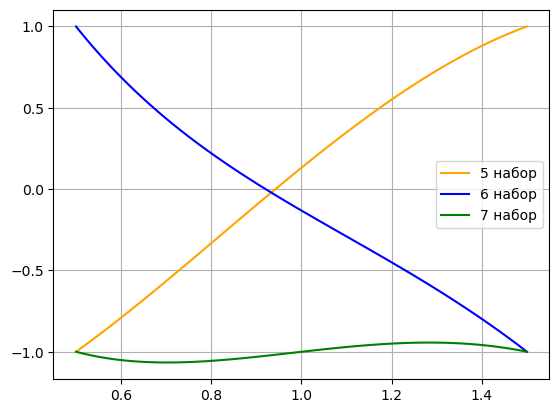

In [7]:
# построим на одном графике все три набора 5-7
c11, c21 = solve_linear_system(1, -1, 1)
c12, c22 = solve_linear_system(1, 1, -1)
c13, c23 = solve_linear_system(1, -1, -1)

x = np.arange(0.5, 1.51, 0.01)
y1 = -3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c11 * np.sqrt(x) + c21
y2 = (-3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c12 * np.sqrt(x)) + c22
y3 = (-3 * x**2 * np.sqrt(x) + 5*x**2 + 2 * c13 * np.sqrt(x)) + c23

plt.plot(x, y1, color="orange", label="5 набор")
plt.plot(x, y2, color="blue", label="6 набор")
plt.plot(x, y3, color="green", label="7 набор")
plt.legend()
plt.grid(True)
plt.show()

### Получили, что 7 набор идентичен первому набору, а 5 и 6 оказались похожими

### Задание 10.2.15

Найти приближенное решение краевой задачи методом конечных
разностей:

\begin{equation*}
 \begin{cases}
   u'' + \frac{1}{2}e^{-x}u' + 10(1+\sin^2x)u = 12, x \in (0, 1),
   \\
   u(0) = -1, \text{   } u(1) = 4
 \end{cases}
\end{equation*}

c заданной точностью $\varepsilon = 0.02$ и построить его график

1. Cоставить разностную схему второго порядка точности и выписать
коэффициенты матрицы системы уравнений и коэффициенты правой части.

Дискретизируем вторую производную:
$$ u'' = \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h^2} $$

Дискретизируем первую производную:
$$ u' = \dfrac{u_{i+1} - u_{i-1}}{2h} $$

Подставим это в исходное уравнение и выразим $u_{i+1}$, $u_{i-1}$ и $u_{i}$ в левой части:
$$ u_{i-1} : \dfrac{1}{h^2} - \dfrac{1}{4h} e^{-x}  $$
$$ u_{i} : -\dfrac{2}{h^2} + 10 \cdot (1+\sin^2x) $$
$$ u_{i+1} : \dfrac{1}{h^2} + \dfrac{1}{4h} e^{-x}  $$

## Тестовый пример

\begin{equation*}
 \begin{cases}
   u'' + u' + u = 0, x \in (0, 1),
   \\
   u(0) = 0, \text{   } u(2) = 4
 \end{cases}
\end{equation*}

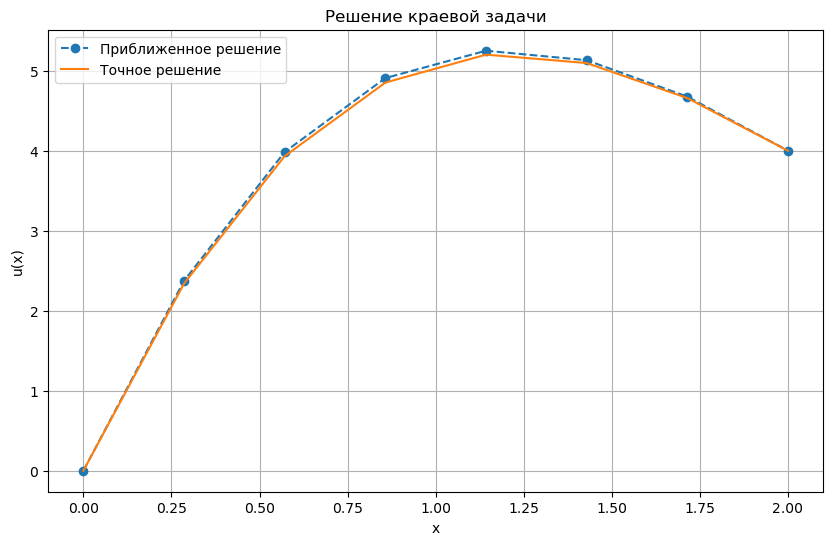

In [37]:
# Заданные параметры
N = 7  # Количество узлов
a = 0
b = 2
h = (b - a) / N
x = np.linspace(a, b, N+1)

# Инициализация матрицы и правой части
A = np.zeros((N+1, N+1))
b = np.zeros(N+1)

for i in range(1, N):
    A[i, i-1] = 1 / h**2 - 0.5 / h
    A[i, i] = -2 / h**2+1
    A[i, i+1] = 1 / h**2 + 0.5 / h
    b[i] = 0

# Учет граничных условий
A[0, 0] = 1
b[0] = 0
A[N, N] = 1
b[N] = 4

# Решение системы уравнений
u = np.linalg.solve(A, b)

# Точное решение
def exact_solution(x):
    return 11.01604 * np.e**(-x/2) * np.sin(np.sqrt(3)*x/2)

exact_u = exact_solution(x)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='Приближенное решение', linestyle='--', marker='o')
plt.plot(x, exact_u, label='Точное решение', linestyle='-')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи')
plt.legend()
plt.grid(True)
plt.show()

### Все работает. Теперь сделаем для основной задачи.

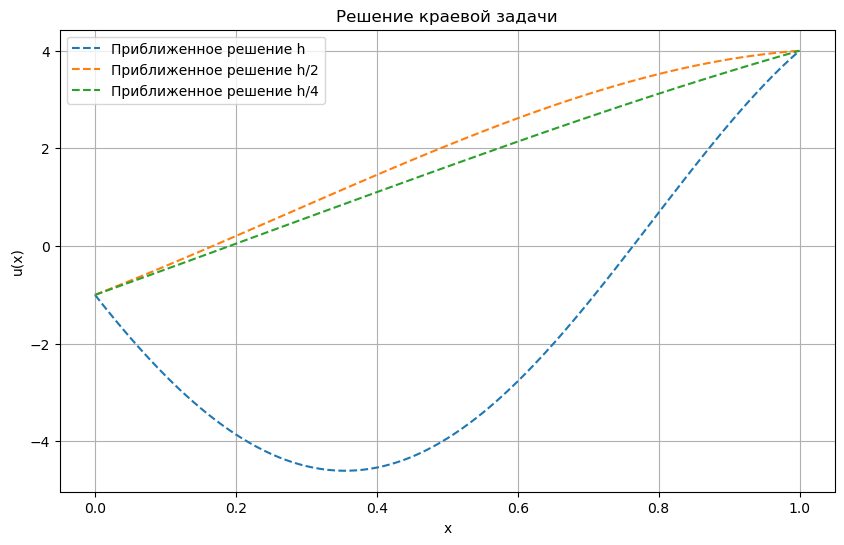

In [40]:
# Заданные параметры
N = 100  # Количество узлов
a = 0
b = 1
h = (b - a) / N
x = np.linspace(a, b, N+1)

# Инициализация матрицы и правой части
A = np.zeros((N+1, N+1))
b = np.zeros(N+1)

for i in range(1, N):
    A[i, i-1] = 1 / h**2 - 0.25 * np.exp(-x[i]) / h
    A[i, i] = -2 / h**2 + 10 * (1 + np.sin(x[i])**2)
    A[i, i+1] = 1 / h**2 + 0.25 * np.exp(-x[i]) / h
    b[i] = 12

# Учет граничных условий
A[0, 0] = 1
b[0] = -1
A[N, N] = 1
b[N] = 4

# Решение системы уравнений
u = np.linalg.solve(A, b)

h = h/2

# Инициализация матрицы и правой части
A = np.zeros((N+1, N+1))
b = np.zeros(N+1)

for i in range(1, N):
    A[i, i-1] = 1 / h**2 - 0.25 * np.exp(-x[i]) / h
    A[i, i] = -2 / h**2 + 10 * (1 + np.sin(x[i])**2)
    A[i, i+1] = 1 / h**2 + 0.25 * np.exp(-x[i]) / h
    b[i] = 12

# Учет граничных условий
A[0, 0] = 1
b[0] = -1
A[N, N] = 1
b[N] = 4

# Решение системы уравнений
u2 = np.linalg.solve(A, b)

h = h/2

# Инициализация матрицы и правой части
A = np.zeros((N+1, N+1))
b = np.zeros(N+1)

for i in range(1, N):
    A[i, i-1] = 1 / h**2 - 0.25 * np.exp(-x[i]) / h
    A[i, i] = -2 / h**2 + 10 * (1 + np.sin(x[i])**2)
    A[i, i+1] = 1 / h**2 + 0.25 * np.exp(-x[i]) / h
    b[i] = 12

# Учет граничных условий
A[0, 0] = 1
b[0] = -1
A[N, N] = 1
b[N] = 4

# Решение системы уравнений
u4 = np.linalg.solve(A, b)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='Приближенное решение h', linestyle='--')
plt.plot(x, u2, label='Приближенное решение h/2', linestyle='--')
plt.plot(x, u4, label='Приближенное решение h/4', linestyle='--')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
eps = 0.02
u = u2.copy()
u_prev = u4.copy()
it = 3
while max(u - u_prev) > eps:
    u_prev = u.copy()
    h = h/2
    it += 1

    # Инициализация матрицы и правой части
    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)

    for i in range(1, N):
        A[i, i-1] = 1 / h**2 - 0.25 * np.exp(-x[i]) / h
        A[i, i] = -2 / h**2 + 10 * (1 + np.sin(x[i])**2)
        A[i, i+1] = 1 / h**2 + 0.25 * np.exp(-x[i]) / h
        b[i] = 12

    # Учет граничных условий
    A[0, 0] = 1
    b[0] = -1
    A[N, N] = 1
    b[N] = 4

    # Решение системы уравнений
    u = np.linalg.solve(A, b)
    
it

4

### Получили, что нужная точность достигается при h = $\dfrac{h}{8}$

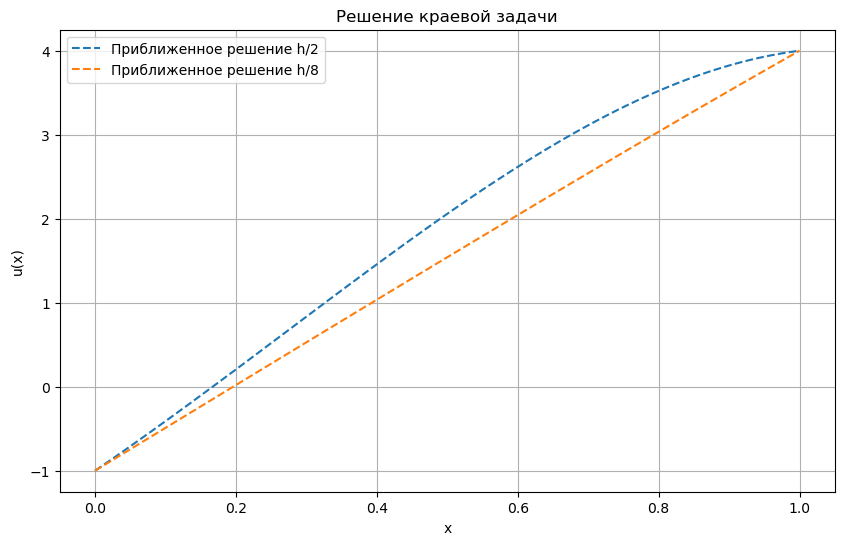

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, u2, label='Приближенное решение h/2', linestyle='--')
plt.plot(x, u, label='Приближенное решение h/8', linestyle='--')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи')
plt.legend()
plt.grid(True)
plt.show()